# Titanic : Machine Learning from Disaster
### Predict Survival on the Titanic
- Defining the Problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Feature selection
- Modeling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survie.
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

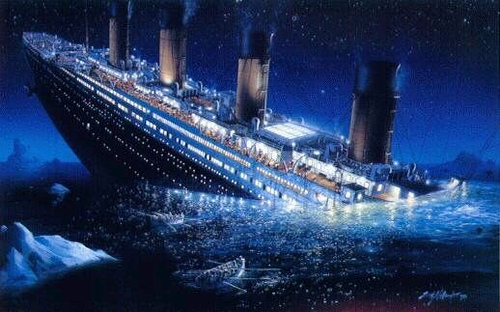

In [2]:
from IPython.display import Image
Image("/Users/GW/conda/kaggle/titanic/image/titanic-sinking.jpg")

## 2. Collecting the data
training data set and testing data set are given by Kaggle you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic)

### load train, test dataset using Pandas

In [3]:
import pandas as pd

train = pd.read_csv('/Users/GW/conda/kaggle/titanic/train.csv')
test = pd.read_csv('/Users/GW/conda/kaggle/titanic/test.csv')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived : 0=No, 1=Yes
- Pclass : Ticket class 1=1st, 2=2nd, 3=3rd
- SibSp : # of siblings / spouses aboard the Titanic
- Parch : # or parents / children aboard the Titanic
- Ticket : Ticket number
- Cabin : Cabin number
- Embarked : Port of Embarkation C=Cherbourg, Q=Queenstown, S=Southampton
=> Feature Engineering : Managing NaN data -> Mean or Delete

### Total rows and columns
We can see that there are 891 rows and 12 columns in our training dataset.

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Import python lib for visualization